# Group36 ML Assignment
* Abhijith K.S         - 2020fc04193
* Pankaj Kumar Roshan  -  2020fc04211
* Keesari Shravya      -  2020fc04582



# Part-A

# Import Libraries/Dataset

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Upload heart.csv file into current directory
data = pd.read_csv("heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Visualization and Exploration

In [3]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# copy the data to another df for analysis so that the original df stays same
data_to_use = data.copy()

### Description of columns
* age
* sex: [1-> Male, 0-> Female]
*chest pain type: [4 values]
*resting blood pressure
*serum cholestoral in mg/dl
*fasting blood sugar > 120 mg/dl: [1->true, 0->false]
*resting electrocardiographic results: [0,1,2]
*maximum heart rate achieved
*exercise induced angina: [1->yes, 0->no]
*oldpeak = ST depression induced by exercise relative to rest
*the slope of the peak exercise ST segment
*number of major vessels (0-4) colored by flourosopy
*thal: [0,1,2,3]

In [8]:
# print the number of unique values in each of the columns
for item in data:
  print(item , data[item].nunique())

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


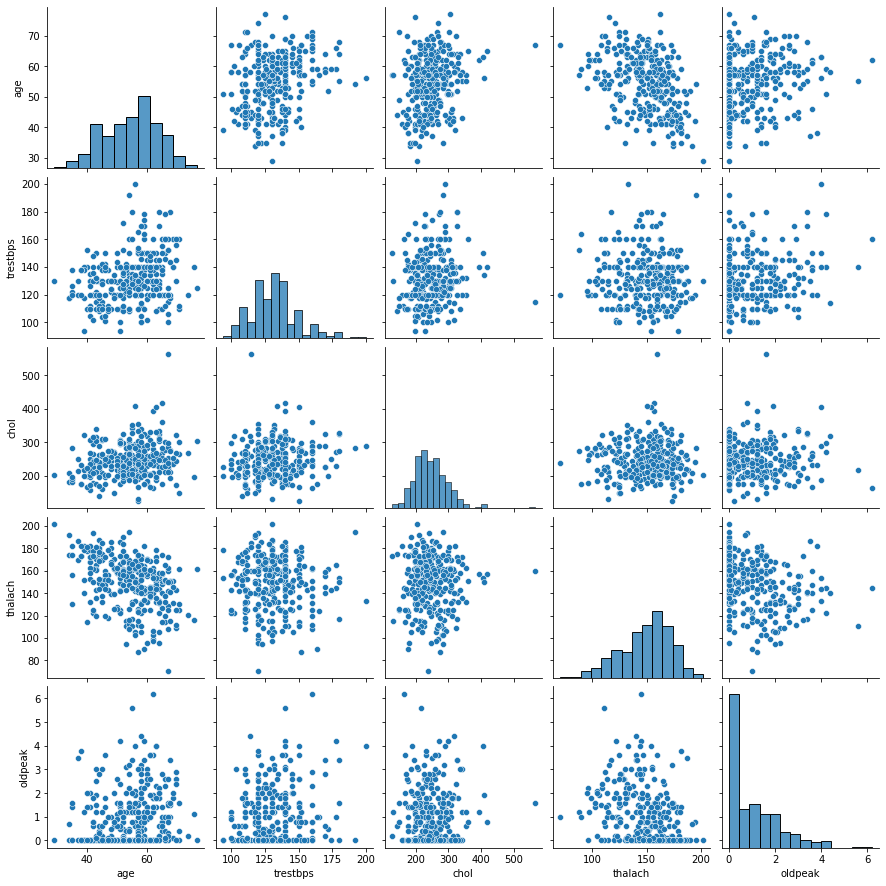

In [9]:
# plotting pairpolt for numerical columns to identify basic corelations
contdata = data_to_use[["age","trestbps","chol","thalach","oldpeak"]].copy() # creating a df wit continuous values
sns.pairplot(contdata)
plt.show()

**Important observation** : *There is a negative correlation between age and thalach i.e. people with higher age have lesser heart rate and people with lower age have higher heart rate*

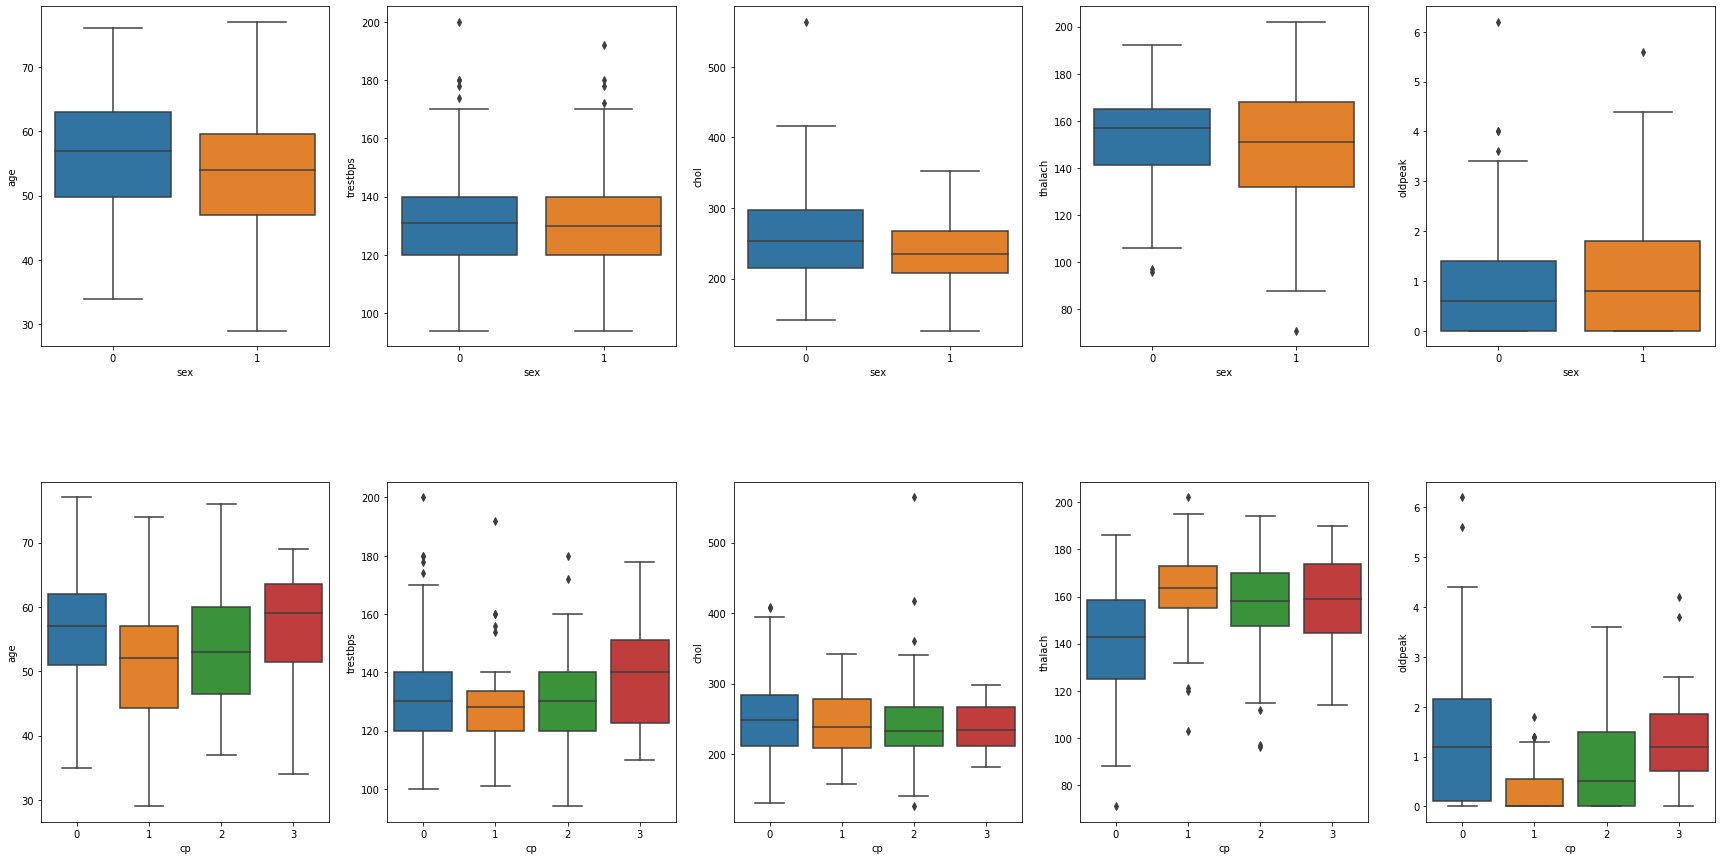

In [10]:
# Plotting boxplots for numerical columns with sex and cp
categdata_to_use_in_boxplot = data_to_use[['sex','cp']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

**Important Observation**

* *In the given dataset the distrbution of Male and Female people is similar in age, trestbps, chol, thalach, oldpeak*
* *Chest pain type 3 is prominent in age group people of 50-65yrs*


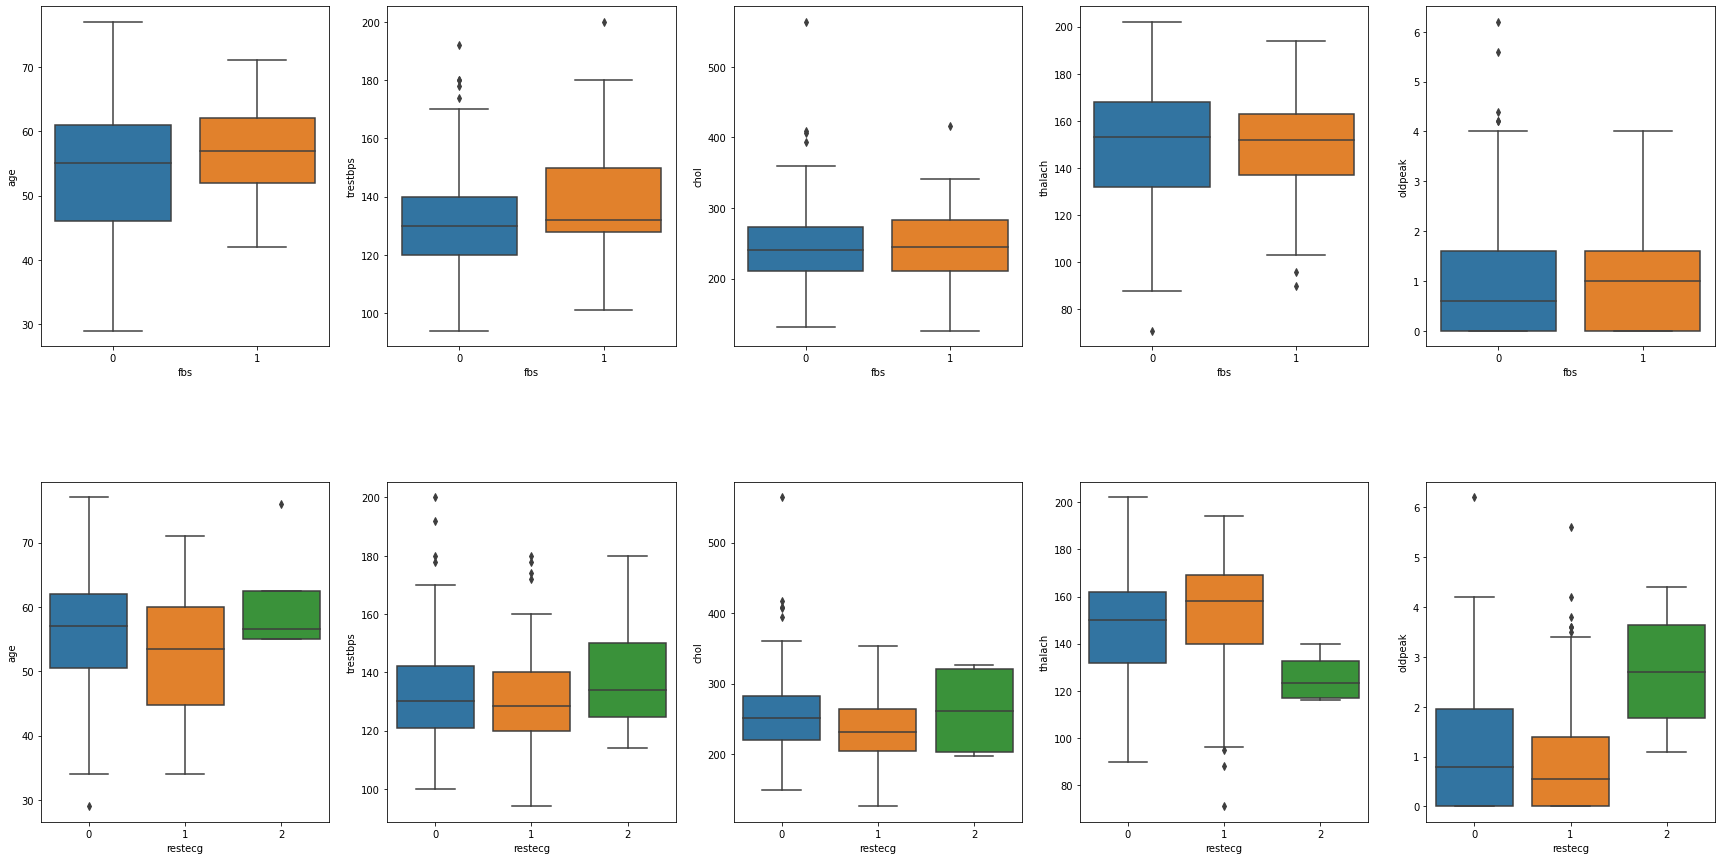

In [11]:
# Plotting boxplots for numerical columns with fbs and resteg
categdata_to_use_in_boxplot = data_to_use[['fbs','restecg']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

**Important Observation**
* *fasting blood sugar > 120 mg/dl [1->true, 0->false]*
* *resting electrocardiographic results (values 0,1,2)*


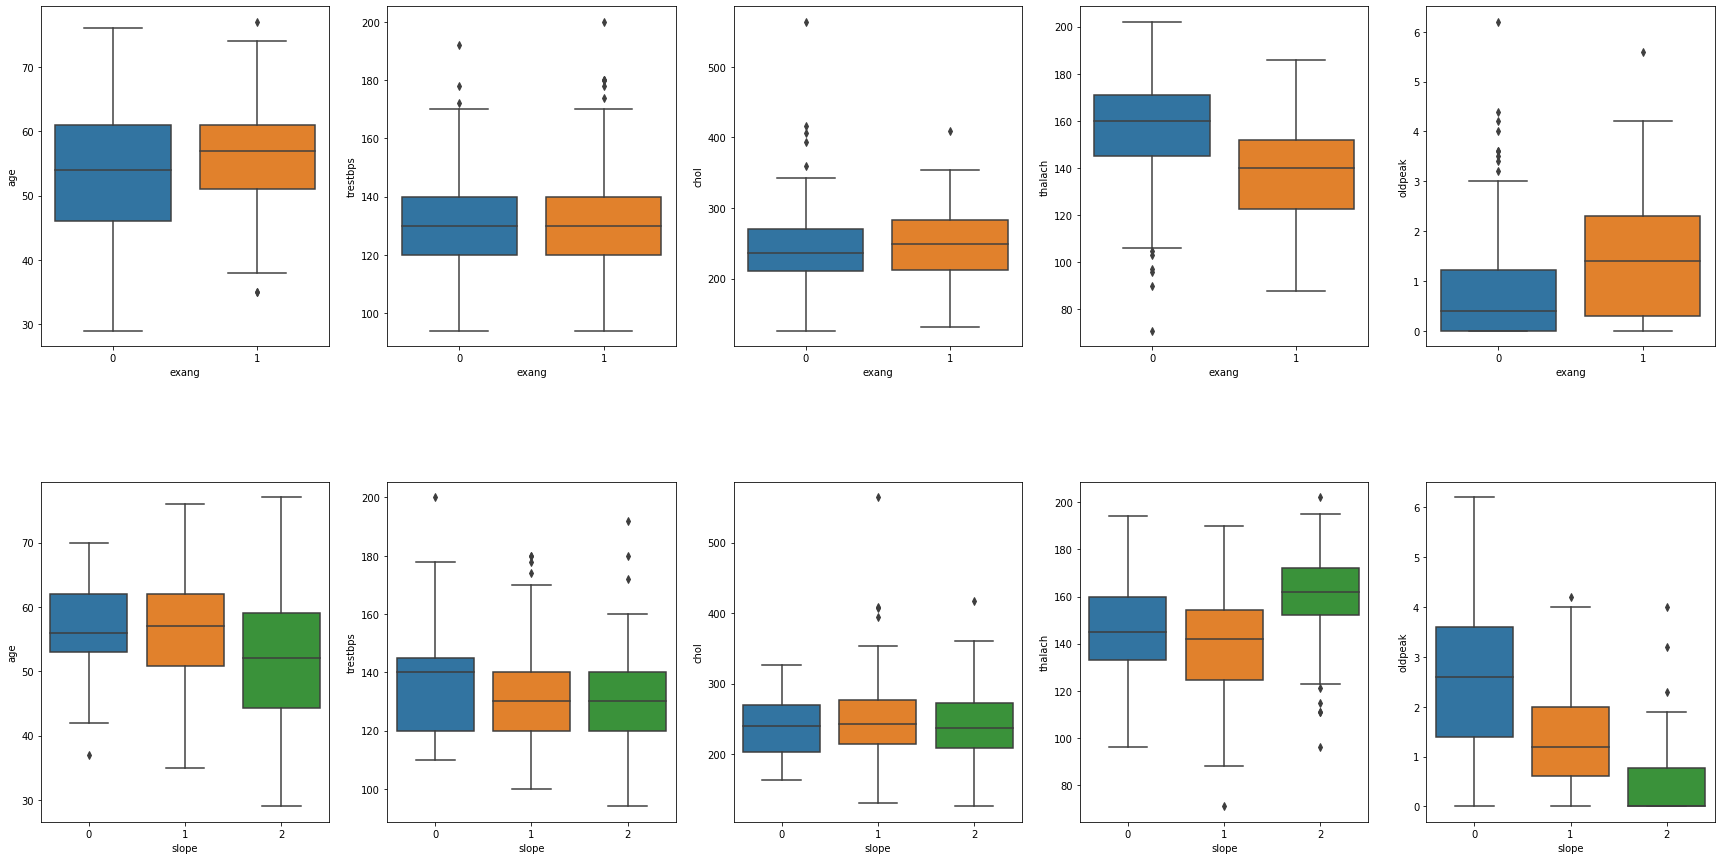

In [12]:
# Plotting boxplots for numerical columns with exang and slope
categdata_to_use_in_boxplot = data_to_use[['exang','slope']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

**Important Observation**
* exang: exercise induced angina (1 = yes; 0 = no)
* slope: the slope of the peak exercise ST segment (3 values)

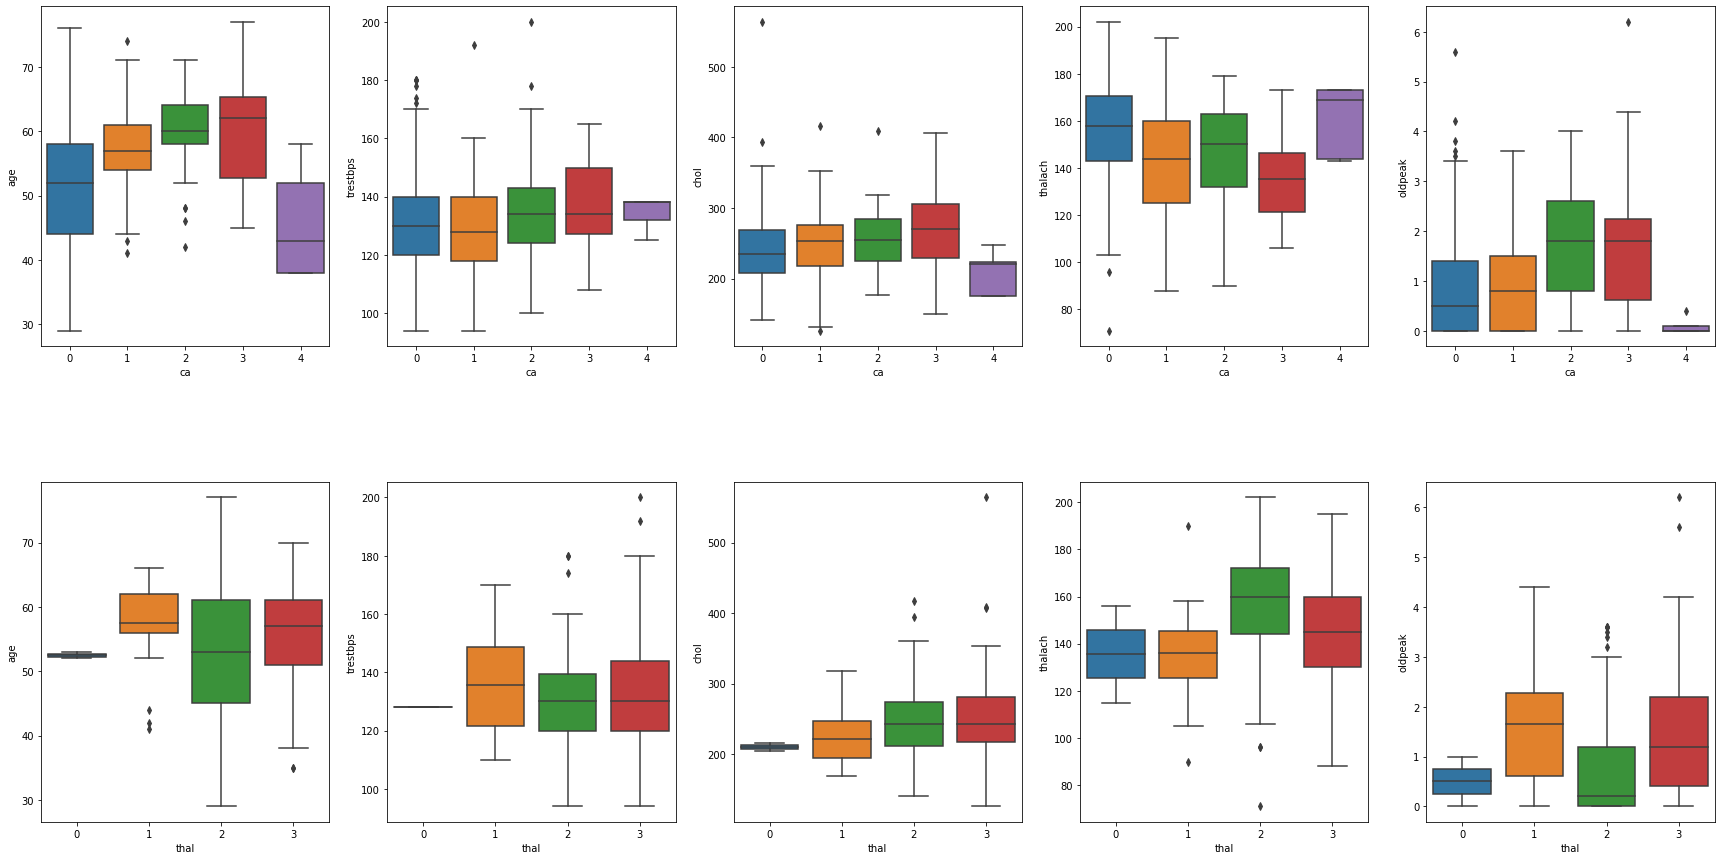

In [13]:
# Plotting boxplots for numerical columns with ca and thal
categdata_to_use_in_boxplot = data_to_use[['ca','thal']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

**Important Observation**
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

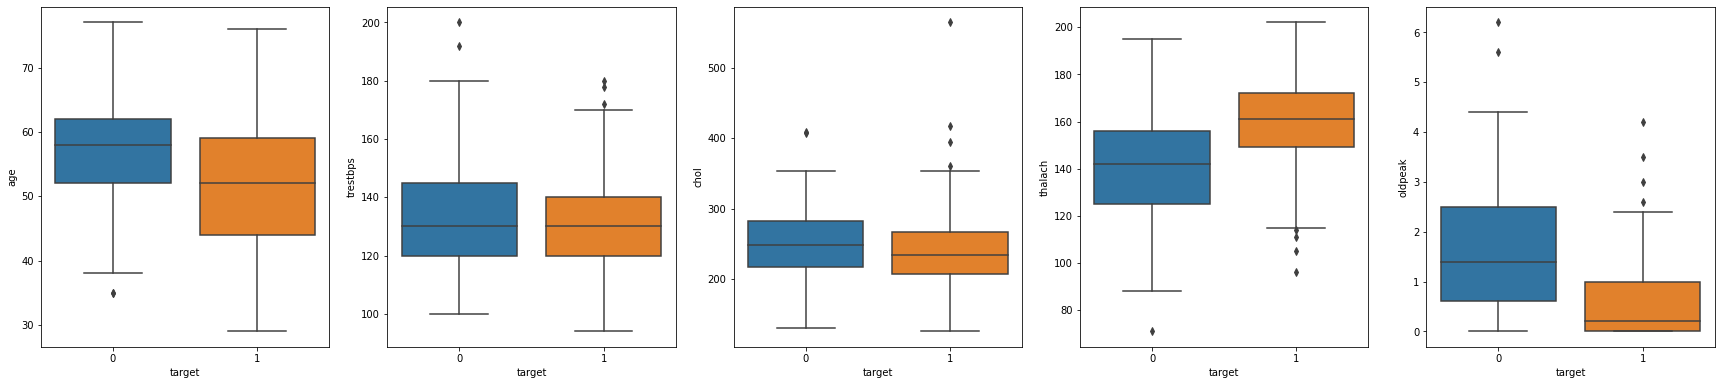

In [14]:
# Plotting boxplots for numerical columns with target
categdata_to_use_in_boxplot = data_to_use[['target']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

**Important Observation**
* target: diagnosis of heart disease (angiographic disease status)
  -- Value 0: < 50% diameter narrowing
  -- Value 1: > 50% diameter narrowing

# Data Pre-processing and cleaning 

In [15]:
# percentage of the data having null values
round(data.isnull().sum()*100/len(data),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

We can see that there are no missing values in any of the columns

In [16]:
# Trying to remove duplicate rows
data = data.drop_duplicates()
data.shape

(302, 14)

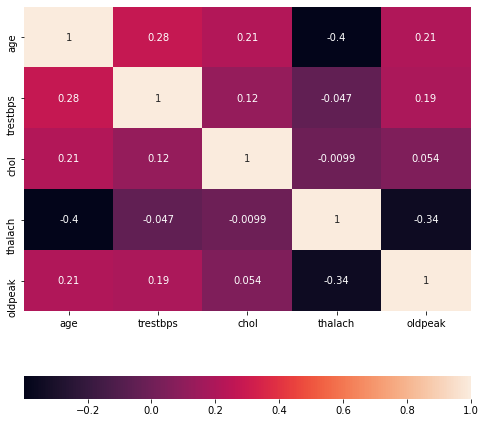

In [17]:
# Creating a correlation heat map for all the numerical values
plt.figure(figsize=(8,8))
sns.heatmap(contdata.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'})
plt.show()


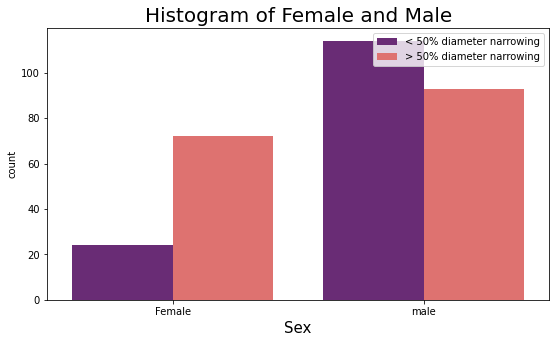

In [18]:
# Plotting histogram for target variable while seperating gthem wit sex
x = ["Female","male"]
values = range(len(x))

plt.figure(figsize=(9,5))
ax = sns.countplot(x="sex", hue="target", data=data_to_use, palette='magma')
plt.title("Histogram of Female and Male",fontsize = 20)
plt.legend(["< 50% diameter narrowing","> 50% diameter narrowing"],loc='upper right')
plt.xlabel("Sex",fontsize = 15)
plt.xticks(values,x)
plt.show()

# Data Preparation

### Feature creation

In [19]:
# Creating a function for feature engineering
# here we have created additional features from eisting features based on combining the features after binning them 
# for example age is converted to bins with seize of 10 and chol is converted to bins with size 40
def feature_creation(df):
    df['age2'] = df['age']//10 # Coverting to bins
    df['trestbps2'] = df['trestbps']//10 # converting to data ranges
    df['chol2'] = df['chol']//40
    df['thalach2'] = df['thalach']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data = feature_creation(data)

In [20]:
# we now have 61 columns in total
pd.set_option('max_columns', len(data.columns)+1)
len(data.columns)

61

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5,3,5.0,1_3,1_14,1_5,1_3,1_5.0,1_0,1_0,6_3,6_14,6_5,6_3,6_5.0,6_0,6_0,1_3,1_14,1_5,1_3,1_5.0,1_0,1_0,0_3,0_14,0_5,0_3,0_5.0,0_0,0_0,0_3,0_14,0_5,0_3,0_5.0,0_0,0_0,1_3,1_14,1_5,1_3,1_5.0,1_0,1_0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6,4,8.0,1_2,1_13,1_6,1_4,1_8.0,1_0,1_0,3_2,3_13,3_6,3_4,3_8.0,3_0,3_0,0_2,0_13,0_6,0_4,0_8.0,0_0,0_0,1_2,1_13,1_6,1_4,1_8.0,1_0,1_0,0_2,0_13,0_6,0_4,0_8.0,0_0,0_0,2_2,2_13,2_6,2_4,2_8.0,2_0,2_0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5,4,3.0,0_1,0_13,0_5,0_4,0_3.0,0_2,0_0,4_1,4_13,4_5,4_4,4_3.0,4_2,4_0,0_1,0_13,0_5,0_4,0_3.0,0_2,0_0,0_1,0_13,0_5,0_4,0_3.0,0_2,0_0,0_1,0_13,0_5,0_4,0_3.0,0_2,0_0,2_1,2_13,2_5,2_4,2_3.0,2_2,2_0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5,12,5,4,2.0,1_1,1_12,1_5,1_4,1_2.0,1_2,1_0,5_1,5_12,5_5,5_4,5_2.0,5_2,5_0,0_1,0_12,0_5,0_4,0_2.0,0_2,0_0,1_1,1_12,1_5,1_4,1_2.0,1_2,1_0,0_1,0_12,0_5,0_4,0_2.0,0_2,0_0,2_1,2_12,2_5,2_4,2_2.0,2_2,2_0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5,12,8,4,1.0,0_0,0_12,0_8,0_4,0_1.0,0_2,0_0,5_0,5_12,5_8,5_4,5_1.0,5_2,5_0,0_0,0_12,0_8,0_4,0_1.0,0_2,0_0,1_0,1_12,1_8,1_4,1_1.0,1_2,1_0,1_0,1_12,1_8,1_4,1_1.0,1_2,1_0,2_0,2_12,2_8,2_4,2_1.0,2_2,2_0


In [22]:
# Determining categorical features by filtering out all the numerical columns
categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
categorical_columns

['sex_cp',
 'sex_trestbps2',
 'sex_chol2',
 'sex_thalach2',
 'sex_oldpeak2',
 'sex_slope',
 'sex_ca',
 'age2_cp',
 'age2_trestbps2',
 'age2_chol2',
 'age2_thalach2',
 'age2_oldpeak2',
 'age2_slope',
 'age2_ca',
 'fbs_cp',
 'fbs_trestbps2',
 'fbs_chol2',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_trestbps2',
 'restecg_chol2',
 'restecg_thalach2',
 'restecg_oldpeak2',
 'restecg_slope',
 'restecg_ca',
 'exang_cp',
 'exang_trestbps2',
 'exang_chol2',
 'exang_thalach2',
 'exang_oldpeak2',
 'exang_slope',
 'exang_ca',
 'thal_cp',
 'thal_trestbps2',
 'thal_chol2',
 'thal_thalach2',
 'thal_oldpeak2',
 'thal_slope',
 'thal_ca']

In [23]:
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5,3,5.0,7,15,11,5,18,3,4,16,28,22,11,35,10,13,7,15,12,6,19,3,5,3,4,4,1,7,0,0,3,4,4,2,8,0,0,5,4,2,3,8,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6,4,8.0,6,14,12,6,21,3,4,3,3,3,2,6,1,1,2,3,5,3,12,0,0,6,14,12,7,22,3,5,2,3,5,3,11,0,0,8,11,9,8,18,5,5
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5,4,3.0,1,3,4,2,4,2,0,6,9,8,5,11,6,3,1,3,4,3,7,2,0,1,3,4,2,5,2,0,1,3,4,3,6,2,0,7,11,8,8,13,7,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5,12,5,4,2.0,5,13,11,6,15,5,4,10,14,15,8,21,9,8,1,2,4,3,6,2,0,5,13,11,7,16,5,5,1,2,4,3,5,2,0,7,10,8,8,12,7,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5,12,8,4,1.0,0,2,7,2,1,2,0,9,14,18,8,17,9,8,0,2,7,3,1,2,0,4,13,14,7,13,5,5,4,12,15,7,14,5,5,6,10,11,8,11,7,5


In [25]:
# latest size of the data
data.shape

(302, 61)

### Feature selection

In [26]:
#creating tarining data and seperating the target columns for featrure selection process
train = data.copy()
target = train.pop('target')
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,6,14,5,3,5.0,7,15,11,5,18,3,4,16,28,22,11,35,10,13,7,15,12,6,19,3,5,3,4,4,1,7,0,0,3,4,4,2,8,0,0,5,4,2,3,8,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,3,13,6,4,8.0,6,14,12,6,21,3,4,3,3,3,2,6,1,1,2,3,5,3,12,0,0,6,14,12,7,22,3,5,2,3,5,3,11,0,0,8,11,9,8,18,5,5


In [27]:
# creating an empty list for capturing best features
features_best = []

#### Pearson correlation

In [28]:
# We use Pearson correlation for feature selection
# Threshold for removing correlated variables
threshold = 0.9

def highlight_threshold(value):
    if value > threshold:
        style = 'background-color: cyan'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight_threshold)

In [29]:
# We filter out the columns with correlation values below threshold of 0.9
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best=features_filtered.columns.tolist()

The number of features that passed the collinearity threshold:  29


In [30]:
# printing columns that can be used for model building
features_best

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'thalach2',
 'sex_cp',
 'sex_oldpeak2',
 'sex_ca',
 'fbs_cp',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_oldpeak2',
 'exang_cp',
 'exang_oldpeak2',
 'exang_slope',
 'thal_oldpeak2']

In [31]:
#Copying best features to main cols and printing the total number of features
main_cols = features_best
len(main_cols)

29

### EDA for Model Selection

In [32]:
# setting option to max_columns and show statistics of the new features
pd.set_option('max_columns', len(main_cols)+1)
data[main_cols].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach2,sex_cp,sex_oldpeak2,sex_ca,fbs_cp,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_oldpeak2,exang_cp,exang_oldpeak2,exang_slope,thal_oldpeak2
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046,3.278146,3.692053,10.099338,3.447020,1.559603,2.874172,5.817881,1.844371,1.463576,3.066225,9.347682,2.274834,7.619205,2.380795,15.824503
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970,0.668801,2.084877,6.449657,2.217907,1.839424,1.562878,5.887366,1.203104,2.171317,2.372794,6.671328,1.754149,7.692428,1.387185,7.192119
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,2.000000,4.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,10.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,10.000000,4.000000,1.000000,2.000000,6.000000,2.000000,0.000000,4.000000,12.000000,2.000000,5.000000,2.000000,13.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,4.000000,5.000000,15.000000,5.000000,2.000000,3.000000,9.000000,2.000000,2.000000,5.000000,13.000000,4.000000,13.000000,4.000000,22.750000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,5.000000,7.000000,22.000000,8.000000,7.000000,7.000000,23.000000,5.000000,9.000000,9.000000,27.000000,7.000000,24.000000,5.000000,31.000000


# Part-B

# Modeling building and Performance evaluation

In [33]:
# Separating  Target column
target_name = 'target'
target0 = data[target_name]
train0 = data[main_cols].drop([target_name], axis=1)

In [34]:
# For boosting model we craete seperate traning and test data
train0b = train0.copy()
test_train_split_part = 0.2
random_state = 40

# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)

In [35]:
trainb.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach2,sex_cp,sex_oldpeak2,sex_ca,fbs_cp,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_oldpeak2,exang_cp,exang_oldpeak2,exang_slope,thal_oldpeak2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,4,0,0,0,0,3,0,2,0,4,12,0,0,2,10
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,4,1,0,0,1,3,0,2,0,5,12,1,0,2,10
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,4,0,0,0,0,3,0,2,0,0,0,0,0,2,10
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,4,2,0,0,2,3,0,2,0,6,12,2,0,2,10
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,4,2,0,0,2,3,0,2,0,2,0,2,0,2,10


In [36]:
testb.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach2,sex_cp,sex_oldpeak2,sex_ca,fbs_cp,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_oldpeak2,exang_cp,exang_oldpeak2,exang_slope,thal_oldpeak2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,4,4,16,4,0,3,7,2,0,4,17,0,6,2,13
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,3,2,0,0,2,2,0,2,0,6,12,2,0,2,19
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,4,1,0,2,1,3,0,2,2,5,12,1,0,2,10
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,2,4,18,7,0,1,9,1,3,0,7,0,8,1,15
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,4,6,10,8,2,3,0,2,4,6,12,2,0,2,10


In [37]:
# For models from Sklearn we perform normalization of features
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
#scaler2 = StandardScaler()
scaler2 = RobustScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)

In [38]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)

In [39]:
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach2,sex_cp,sex_oldpeak2,sex_ca,fbs_cp,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_oldpeak2,exang_cp,exang_oldpeak2,exang_slope,thal_oldpeak2
69,0.500000,-1.0,-0.5,-0.30,-0.494118,0.0,0.0,0.320611,0.0,-0.5,1.0,0.0,0.0,1.0,-1.333333,-0.909091,-1.0,-0.5,1.0,-0.666667,0.0,0.0,0.0,0.000000,-0.666667,-0.384615,0.0,-0.235294
118,-0.730769,-1.0,0.0,-1.25,-0.572549,0.0,0.0,0.595420,0.0,-0.5,1.0,0.0,0.0,1.0,-1.000000,-0.909091,-1.0,0.0,1.0,-0.666667,0.0,0.0,0.2,0.000000,-0.333333,-0.384615,0.0,-0.235294
49,-0.192308,-1.0,-0.5,0.40,-0.101961,0.0,-1.0,0.229008,0.0,-0.5,1.0,0.0,0.0,1.0,-1.333333,-0.909091,-1.0,-0.5,1.0,-0.666667,0.0,0.0,-0.8,-1.333333,-0.666667,-0.384615,0.0,-0.235294


In [40]:
test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach2,sex_cp,sex_oldpeak2,sex_ca,fbs_cp,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_oldpeak2,exang_cp,exang_oldpeak2,exang_slope,thal_oldpeak2
18,-0.961538,0.0,-0.5,1.0,0.101961,0.0,0.0,0.564885,0.0,0.4375,1.0,0.0,0.0,1.0,0.000000,0.545455,0.0,-0.5,1.0,0.111111,0.0,0.0,0.0,0.555556,-0.666667,0.076923,0.0,0.000000
112,0.653846,-1.0,0.5,0.5,1.137255,0.0,0.0,-0.595420,0.0,-0.3750,1.0,0.0,1.0,0.0,-0.666667,-0.909091,-1.0,0.5,0.0,-0.666667,0.0,0.0,0.4,0.000000,0.000000,-0.384615,0.0,0.470588
102,0.576923,-1.0,0.0,0.5,-0.713725,0.0,0.0,0.809160,0.0,-0.5000,1.0,2.0,0.0,1.0,-1.000000,-0.909091,-0.5,0.0,1.0,-0.666667,0.0,1.0,0.2,0.000000,-0.333333,-0.384615,0.0,-0.235294


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 69 to 219
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               241 non-null    float64
 1   sex               241 non-null    float64
 2   cp                241 non-null    float64
 3   trestbps          241 non-null    float64
 4   chol              241 non-null    float64
 5   fbs               241 non-null    float64
 6   restecg           241 non-null    float64
 7   thalach           241 non-null    float64
 8   exang             241 non-null    float64
 9   oldpeak           241 non-null    float64
 10  slope             241 non-null    float64
 11  ca                241 non-null    float64
 12  thal              241 non-null    float64
 13  thalach2          241 non-null    float64
 14  sex_cp            241 non-null    float64
 15  sex_oldpeak2      241 non-null    float64
 16  sex_ca            241 non-null    float64
 

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 18 to 90
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               61 non-null     float64
 1   sex               61 non-null     float64
 2   cp                61 non-null     float64
 3   trestbps          61 non-null     float64
 4   chol              61 non-null     float64
 5   fbs               61 non-null     float64
 6   restecg           61 non-null     float64
 7   thalach           61 non-null     float64
 8   exang             61 non-null     float64
 9   oldpeak           61 non-null     float64
 10  slope             61 non-null     float64
 11  ca                61 non-null     float64
 12  thal              61 non-null     float64
 13  thalach2          61 non-null     float64
 14  sex_cp            61 non-null     float64
 15  sex_oldpeak2      61 non-null     float64
 16  sex_ca            61 non-null     float64
 17

In [43]:
# defining model matrix variables
cv_n_split = 3
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4] # you can only select some numbers of metrics from metrics_all

In [44]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
# here we difine some values for accuracy matrix
num_models = 6
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [45]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [46]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [47]:
# Defining functions for calculation of errors that can be used in the models
# Relative error
def relative_accuracy(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))
#RMSE
def rmse_calculated(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [48]:
# Defining functions for confusion matrcix that can be used in the models outputs
def confusionMatrix(target, train_pred, target_test, test_pred):
    # Building the confusion matrices
    
    def confusionMatrix_calculation(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        return cm, annot

    
    # Building the confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)
    
    # Training data curve
    ax = axes[0]
    ax.set_title("Training data")
    cm0, annot0 = confusionMatrix_calculation(target, train_pred)    
    sns.heatmap(cm0, cmap= "YlGnBu", annot=annot0, fmt='', ax=ax)
    
    # Test data curve
    ax = axes[1]
    ax.set_title("Test (validation) data")
    cm1, annot1 = confusionMatrix_calculation(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)
    
    fig.suptitle('CONFUSION MATRICES')
    plt.show()

In [49]:
# Defining Calculation of accuracy of model by different metrics for model selection stage
def accuracy_metrics(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(rmse_calculated(target, ytrain) * 100, 2)
            acc_test = round(rmse_calculated(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(relative_accuracy(target, ytrain) * 100, 2)
            acc_test = round(relative_accuracy(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    confusionMatrix(target, ytrain, target_test, ytest)

In [50]:
# Defining Calculation of accuracy of model by different metrics for prediction stage
def accuracy_metrics_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(rmse_calculated(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(relative_accuracy(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)    

## Linear Regression

target =  [1 1 1 1 1]
ytrain =  [0 1 0 1 1]
target_test = [1 1 1 0 1]
ytest = [0 0 0 0 0]
acc of r2_score for train = -85.15
acc of r2_score for test = -107.8
acc of acc for train = 53.94
acc of acc for test = 49.18
acc of rmse for train = 67.87
acc of rmse for test = 71.29
acc of re for train = 86.05
acc of re for test = 88.57


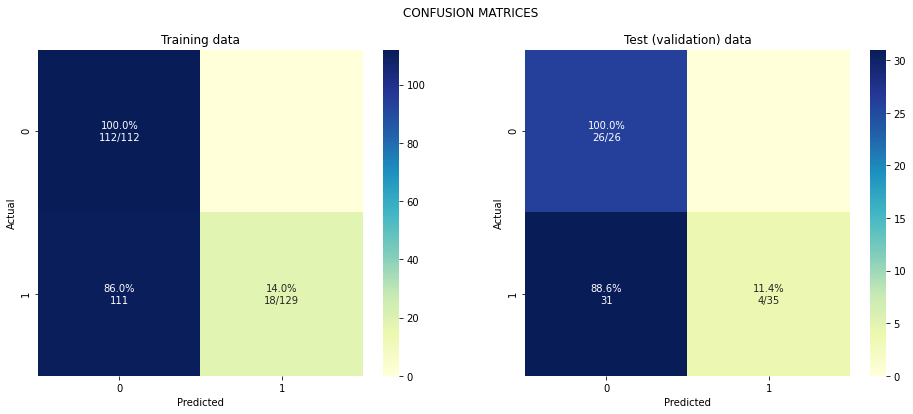

In [51]:
# training a linear regression model using GridSearchCV method
linreg = LinearRegression()
linreg_CV = GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(train, target)
accuracy_metrics(0,linreg_CV,train,test,target,target_test)

**Observation**
* *Very high RMSE values for test and train data*
* *Training and Testing accuracies are not that great - not a very good model*

## Logistic Regression 

{'C': 0.3}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 0]
acc of r2_score for train = 39.95
acc of r2_score for test = 46.37
acc of acc for train = 85.06
acc of acc for test = 86.89
acc of rmse for train = 38.65
acc of rmse for test = 36.21
acc of re for train = 27.91
acc of re for test = 22.86


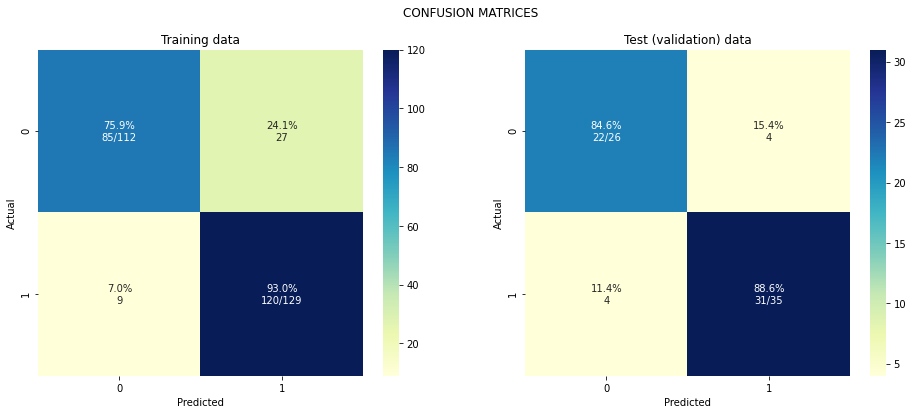

In [52]:
# training a logistic regression model using GridSearchCV method
logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv_train, verbose=False)
logreg_CV.fit(train, target)
print(logreg_CV.best_params_)
accuracy_metrics(1,logreg_CV,train,test,target,target_test)

**Observation**
* *Less RMSE values for test and train data*
* *Accuracies are good for test and train data*

## Decision Tree Classifier

{'min_samples_leaf': 3}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 79.98
acc of r2_score for test = -20.66
acc of acc for train = 95.02
acc of acc for test = 70.49
acc of rmse for train = 22.31
acc of rmse for test = 54.32
acc of re for train = 9.3
acc of re for test = 51.43


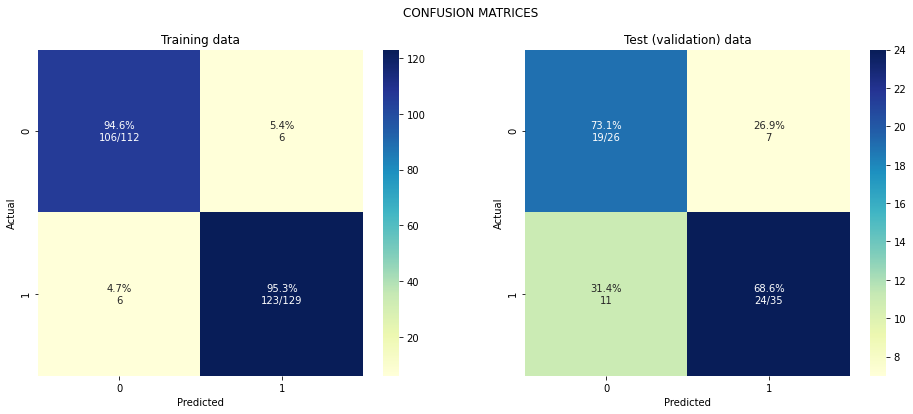

In [53]:
# training a decision tree model using GridSearchCV method
decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
accuracy_metrics(2,decision_tree_CV,train,test,target,target_test)

**Observation**
* *Less RMSE values for test and train data*
* *Accuracies are good for test and train data*

## Random Forest Classifier

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 50, 'n_estimators': 40}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 49.96
acc of r2_score for test = 39.67
acc of acc for train = 87.55
acc of acc for test = 85.25
acc of rmse for train = 35.28
acc of rmse for test = 38.41
acc of re for train = 23.26
acc of re for test = 25.71


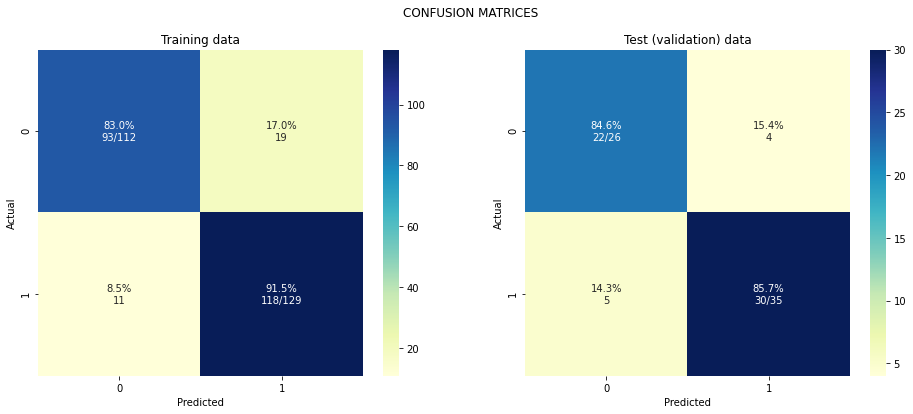

CPU times: user 57.4 s, sys: 565 ms, total: 57.9 s
Wall time: 57.6 s


In [54]:
# training a random_forest classifier model using GridSearchCV method
%%time
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
accuracy_metrics(3,random_forest_CV,train,test,target,target_test)

**Observation**
* *Less RMSE values for test and train data*
* *Accuracies are good for test and train data*

## Gradient Boosting Clasifier

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 5}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 98.33
acc of r2_score for test = 39.67
acc of acc for train = 99.59
acc of acc for test = 85.25
acc of rmse for train = 6.44
acc of rmse for test = 38.41
acc of re for train = 0.78
acc of re for test = 25.71


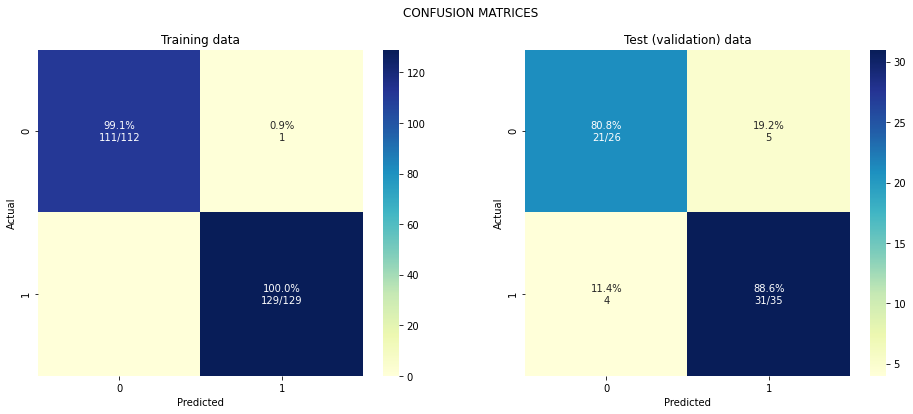

In [55]:
gradient_boosting = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False)
gradient_boosting_CV.fit(train, target)
print(gradient_boosting_CV.best_params_)
accuracy_metrics(4,gradient_boosting_CV,train,test,target,target_test)

**Observation**
* *Very low RMSE values for test and train data*
* *Accuracies are very good for test and train data*

## K-Nearest Neighbours(KNN)

{'n_neighbors': 5}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 0]
acc of r2_score for train = 39.95
acc of r2_score for test = 53.08
acc of acc for train = 85.06
acc of acc for test = 88.52
acc of rmse for train = 38.65
acc of rmse for test = 33.88
acc of re for train = 27.91
acc of re for test = 20.0


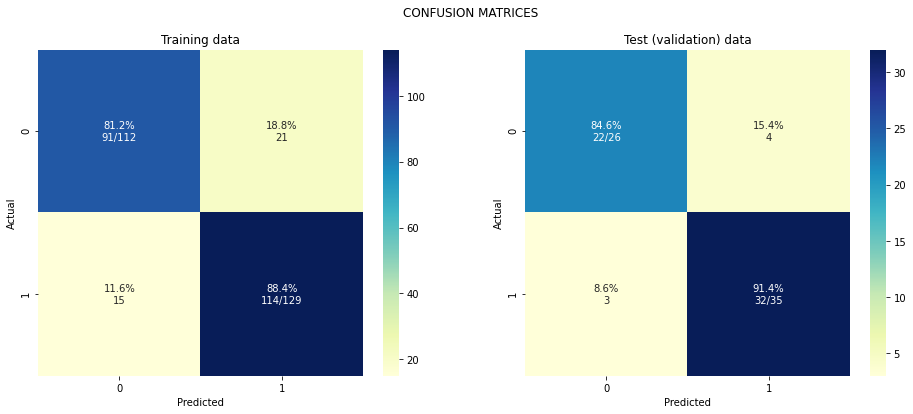

In [56]:
knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 7)}, 
                      cv=cv_train, verbose=False).fit(train, target)
print(knn_CV.best_params_)
accuracy_metrics(5,knn_CV,train,test,target,target_test)

**Observation**
* *Less RMSE values for test and train data*
* *Accuracies are good for test and train data*

# Finding the Best Models

In [57]:
# Creating a datafame all the model values
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
              'Gradient Boosting Classifier', 'KNN']})

In [58]:
# For the df created we capture the train and test accuracies of the corresponding models sorted in the order of test accuracy and then train accuracy
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)

Prediction accuracy for models


,Model,acc_train,acc_test,acc_diff
5,KNN,85.06,88.52,-3.46
1,Logistic Regression,85.06,86.89,-1.83
4,Gradient Boosting Classifier,99.59,85.25,14.34
3,Random Forest Classifier,87.55,85.25,2.30
2,Decision Tree Classifier,95.02,70.49,24.53
0,Linear Regression,53.94,49.18,4.76


# Conclusion

In [59]:
# Choose the number of metric by which the best models will be determined =>  {1 : 'r2_score', 2: 'accuracy_score', 3 : 'relative_error', 4 : 'rmse'}
metrics_main = 2 
xs = metrics_all[metrics_main]
xs_train = metrics_all[metrics_main] + '_train'
xs_test = metrics_all[metrics_main] + '_test'
print('The best models by the',xs,'criterion:')
direct_sort = False if (metrics_main >= 2) else True
models_sort = models.sort_values(by=[xs_test, xs_train], ascending=direct_sort) # sorting based on test and then train accuracy

The best models by the acc criterion:


In [60]:
# Selecting the best models based on the condintion that test accuracy >80% and diffrence between test atnd tarin accuracy less than 10%
models_best = models_sort[(models_sort.acc_diff < 10) & (models_sort.acc_test > 80)]
models_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

,Model,acc_train,acc_test
5,KNN,85.06,88.52
1,Logistic Regression,85.06,86.89
3,Random Forest Classifier,87.55,85.25


Based on the top selected models with accuracy >80, we can go with KNN for our dataset to predict the classification